In [1]:
####### Run a simple analysis of terrain around a selected location

# Step 1: Sign up for a Google Earth Engine Account here:
# https://earthengine.google.com/signup/

# you will use this to authenticate your account with GEE to run the script and
# utilize GEE layers

# Step 2: Setup a local conda environment on your machine to run Python and GEE

# Step 3: Install python, geemap, earthengine-api and pandas in your conda environment

# Step 4: Install python, jupyterlab, matplotlib, geemap, earthengine-api and pandas in your conda environment
# https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html

# Step 5: Launch jupyter-lab and open the Ipython script

# Step 6: Run through the tutorial script

In [2]:
# get any missing modules
! pip install --quiet numpy matplotlib earthengine-api geemap pandas 

In [3]:
# setup modules
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
import sys,os,os.path,tempfile

# spatial modules
import ee
#import geemap # currently not using as colorbars dont load properly in google collab
import geemap.colormaps as cm
import geemap.foliumap as geemap # use folium instead so coloramps work on goolge collab
#import geemap as geemap
#https://geemap.org/notebooks/geemap_and_folium/
#https://geemap.org/notebooks/49_colorbar/#categorical-colorbar
    
import warnings
warnings.filterwarnings('ignore') #don't display warnings

In [4]:
## setup output. defined dir or system temp dir
output_dir=os.path.expanduser(os.path.join(tempfile.gettempdir(),'uas_output'))

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(" ")
print("****** Temporary Output Folder ******")
print("****** Note: In Google Collab, use the dir navigation tool on the left of the screen ******")
print(output_dir)

 
****** Temporary Output Folder ******
****** Note: In Google Collab, use the dir navigation tool on the left of the screen ******
/var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output


In [ ]:
##### initialize ee API  - you need to authenticate with GEE and initialize

## Trigger the authentication flow. You only need to do this once while running notebook
ee.Authenticate()

## After inserting the API key initialize GEE
ee.Initialize()

In [6]:
##### Link to Example Cloud Optimized GeoTiffs (COGs) located in a Google Cloud Storage "bucket"
# URL of file in the GCS bucket
URL = 'gs://bnl_uas_data/NGEEArctic_UAS_Kougarok_20180725_Flight6_RGB_cog.tif'
# using geemap load the COG file into memory
kg_rgb_image = geemap.load_GeoTIFF(URL)
# create a visualization layer for map display
RGB_imageVisParam = {"opacity":1,"bands":["B0","B1","B2"],
                    "min":-4.063213446967957,"max":85.22120105681381,
                     "gamma":1};

# URL of file in the GCS bucket
URL = 'gs://bnl_uas_data/NGEEArctic_UAS_Kougarok_20180725_Flight6_CHM_cog.tif'
kg_chm_image = geemap.load_GeoTIFF(URL)
kg_chm_image = kg_chm_image.select('B0').multiply(0.01)
chm_mask = kg_chm_image.gt(0);
chm_uas_image_masked = kg_chm_image.updateMask(chm_mask);
#print(kg_chm_image.getInfo())
print('CHM Info', kg_chm_image.getInfo()['bands'])
dem_palette = cm.get_palette('Spectral_r', n_class=30)
demViz = {'min': 0.0, 'max': 2.0, 'palette': dem_palette, 'opacity': 1}

# URL of file in the GCS bucket
URL = 'gs://bnl_uas_data/NGEEArctic_UAS_Kougarok_20180725_Flight6_TIR_cog.tif'
kg_tir_image = geemap.load_GeoTIFF(URL)
kg_tir_image = kg_tir_image.select('B0').multiply(0.1)
tir_mask = kg_tir_image.gt(0);
tir_uas_image_masked = kg_tir_image.updateMask(tir_mask);
tir_palette = cm.get_palette('Spectral_r', n_class=30)
tirViz = {'min': 15, 'max': 30, 'palette': tir_palette, 'opacity': 1}

CHM Info [{'id': 'B0', 'data_type': {'type': 'PixelType', 'precision': 'double'}, 'dimensions': [22850, 14148], 'crs': 'EPSG:32603', 'crs_transform': [0.01, 0, 508169.23, 0, -0.010000000000031596, 7226835.705]}]


In [7]:
##### Create a simple map displaying an RGB UAS image (Yang et al., 2021)
# center map over the Kougarok study site
uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=17);
uas_map.addLayer(kg_rgb_image, RGB_imageVisParam, 'UAS_Kougarok_20180725_Flight6_RGB')
uas_map # creates a geemap.folium layer

In [8]:
# Save this example map as an interactive HTML file
html_file = os.path.join(output_dir, 'Example_Kougarok_RGB_UAS_Map.html')
uas_map.save(html_file)

In [9]:
##### Create a simple map displaying a Canopy Height Model (CHM) image for the same UAS flight (Yang et al., 2021)
# center map over Kougarok
uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=17);
uas_map.addLayer(chm_uas_image_masked, demViz, 'UAS_Kougarok_20180725_Flight6_CHM')
uas_map.add_colorbar(vis_params=demViz, label='SfM CHM (meters)')
uas_map

In [10]:
# Save this example map as an interactive HTML file
html_file = os.path.join(output_dir, 'Example_Kougarok_CHM_UAS_Map.html')
uas_map.save(html_file)

In [11]:
##### Create a simple map displaying a Thermal Infrared (TIR) image for the same UAS flight (Yang et al., 2021)
uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=17);
uas_map.addLayer(tir_uas_image_masked, tirViz, 'UAS_Kougarok_20180725_Flight6_TIR')
uas_map.add_colorbar(vis_params=demViz, label='LST (deg C)')
uas_map.addLayerControl()
uas_map

In [12]:
# Save this example map as an interactive HTML file
html_file = os.path.join(output_dir, 'Example_Kougarok_TIR_UAS_Map.html')
uas_map.save(html_file)

In [13]:
### Combined map
# center map over Kougarok
uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=18);
uas_map.addLayer(kg_rgb_image, RGB_imageVisParam, 'UAS_Kougarok_20180725_Flight6_RGB')
uas_map.addLayer(chm_uas_image_masked, demViz, 'UAS_Kougarok_20180725_Flight6_CHM')
uas_map.add_colorbar(vis_params=demViz, label='SfM CHM (meters)')
uas_map.addLayer(tir_uas_image_masked, tirViz, 'UAS_Kougarok_20180725_Flight6_TIR')
uas_map.add_colorbar(vis_params=tirViz, label='LST (deg C)')
uas_map

In [14]:
# Save this example map as an interactive HTML file
html_file = os.path.join(output_dir, 'Example_Kougarok_Combined_RGB_CHM_TIR_UAS_Map.html')
uas_map.save(html_file)

In [15]:
### Combining UAS and other datasets - in this case GEE datasets
elev_dataset = ee.Image('UMN/PGC/ArcticDEM/V3/2m_mosaic')
# https://developers.google.com/earth-engine/datasets/catalog/UMN_PGC_ArcticDEM_V3_2m_mosaic
ned_elevation = elev_dataset.select('elevation')
dem_palette = cm.get_palette('Spectral_r', n_class=30)
demViz2 = {'min': 0.0, 'max': 150, 'palette': dem_palette, 'opacity': 1}

# Global Forest Canopy Height (2005)
gfch = ee.Image('NASA/JPL/global_forest_canopy_height_2005');
forestCanopyHeight = gfch.select('1');
gfch_palette = cm.get_palette('Spectral_r', n_class=30)
gfchViz = {'min': 0.0, 'max': 40.0, 'palette': gfch_palette, 'opacity': 1}


uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=15);
uas_map.addLayer(forestCanopyHeight, gfchViz, 'Global Forest Canopy Height (2005, in meters)')
uas_map.add_colorbar(vis_params=gfchViz, label='Global Forest Canopy Height (2005, in meters)')
uas_map.addLayer(ned_elevation, demViz2, 'Elevation above sea level');
uas_map.add_colorbar(vis_params=demViz2, label='Elevation (meters)')

uas_map.addLayer(kg_rgb_image, RGB_imageVisParam, 'UAS_Kougarok_20180725_Flight6_RGB')
uas_map

In [16]:
# Save this example map as an interactive HTML file
html_file = os.path.join(output_dir, 'Example_Kougarok_GFCH_ArcticDEM_UAS_Map.html')
uas_map.save(html_file)

In [17]:
### Extract random points through CHM layer
# !NOTE: this step tends to take awhile as the data is extracted from the remote file
uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=17);
uas_map.addLayer(chm_uas_image_masked, demViz, 'UAS_Kougarok_20180725_Flight6_CHM')

region = ee.Geometry.Point([-164.8239, 65.1644]).buffer(30)
uas_map.addLayer(ee.Image().paint(region, 0, 4), {'palette': 'yellow'}, "ROI-1")

random_points = geemap.random_sampling(chm_uas_image_masked, region, numPixels=100)
uas_map.addLayer(random_points, {}, "Random Sampling")

uas_map

In [18]:
### Show results of random sampling (x100)
df = geemap.ee_to_pandas(random_points)
print("SfM CHM in meters", df)

SfM CHM in meters           B0
0   0.840782
1   0.076782
2   0.053627
3   0.375153
4   0.225601
..       ...
95  0.251045
96  0.003738
97  0.390968
98  1.191360
99  0.715347

[100 rows x 1 columns]


In [19]:
### Open spectrometer data
pt_refl_data = pd.read_csv('https://storage.googleapis.com/bnl_uas_data/NGEEArctic_Seward_Osprey_Kougarok_20180725_Flight6_Spectra.csv')
pt_refl_data.head()

,Site,Data_Acquisition_Date_UTC,Data_Acquisition_Time_UTC,Longitude_DD,Latitude_DD,Altitude_HAE_Meter,Heading_DD,Yaw_DD,Pitch_DD,Roll_DD,...,Wave_891,Wave_892,Wave_893,Wave_894,Wave_895,Wave_896,Wave_897,Wave_898,Wave_899,Wave_900
0,Seward_Kougarok,20180726,03:27:56.268,-164.825088,65.164664,131.66,65,1.140528,-0.004233,0.114135,...,0.311924,0.327072,0.338234,0.342164,0.337681,0.336077,0.333159,0.328294,0.322149,0.315760
1,Seward_Kougarok,20180726,03:27:58.044,-164.824922,65.164676,131.30,55,0.966609,-0.036548,0.048309,...,0.559171,0.555543,0.548017,0.540087,0.541379,0.548451,0.558910,0.572942,0.591219,0.613979
2,Seward_Kougarok,20180726,03:27:59.654,-164.824718,65.164675,131.19,63,1.115932,-0.008796,0.024185,...,0.524475,0.532793,0.543658,0.555777,0.566562,0.570470,0.568602,0.561128,0.547815,0.528307
3,Seward_Kougarok,20180726,03:28:01.072,-164.824565,65.164669,131.45,82,1.420872,0.007642,0.018258,...,0.452900,0.463432,0.474325,0.487582,0.494661,0.499358,0.501391,0.500863,0.498027,0.493050
4,Seward_Kougarok,20180726,03:28:02.461,-164.824387,65.164658,131.56,97,1.731862,-0.006768,0.018213,...,0.378744,0.385791,0.388877,0.392831,0.399724,0.405420,0.408541,0.409678,0.409419,0.407934


In [20]:
#### Subset the spectra
pt_refl = pt_refl_data.loc[:,'Wave_450':'Wave_850']
pt_refl.head()

,Wave_450,Wave_451,Wave_452,Wave_453,Wave_454,Wave_455,Wave_456,Wave_457,Wave_458,Wave_459,...,Wave_841,Wave_842,Wave_843,Wave_844,Wave_845,Wave_846,Wave_847,Wave_848,Wave_849,Wave_850
0,0.061562,0.062237,0.062963,0.063538,0.063915,0.064050,0.063950,0.063898,0.064087,0.064496,...,0.303810,0.304918,0.306036,0.307680,0.308491,0.309208,0.308799,0.307717,0.307897,0.308635
1,0.039768,0.040270,0.040691,0.040934,0.040989,0.040927,0.040781,0.040707,0.040821,0.041130,...,0.542378,0.540830,0.539613,0.539202,0.538752,0.540700,0.545212,0.550772,0.554460,0.554803
2,0.022563,0.022521,0.022473,0.022434,0.022399,0.022335,0.022322,0.022478,0.022825,0.023156,...,0.533814,0.531289,0.528441,0.527588,0.528297,0.531570,0.535882,0.539481,0.542960,0.547815
3,0.035389,0.035871,0.036541,0.037231,0.037748,0.038043,0.038008,0.037894,0.037931,0.038158,...,0.463907,0.464794,0.464008,0.462172,0.461387,0.463803,0.466635,0.467726,0.467972,0.469683
4,0.055829,0.056990,0.058482,0.059870,0.060830,0.061359,0.061495,0.061630,0.061979,0.062556,...,0.380215,0.377748,0.376110,0.376549,0.377088,0.378881,0.380801,0.381528,0.381022,0.381097


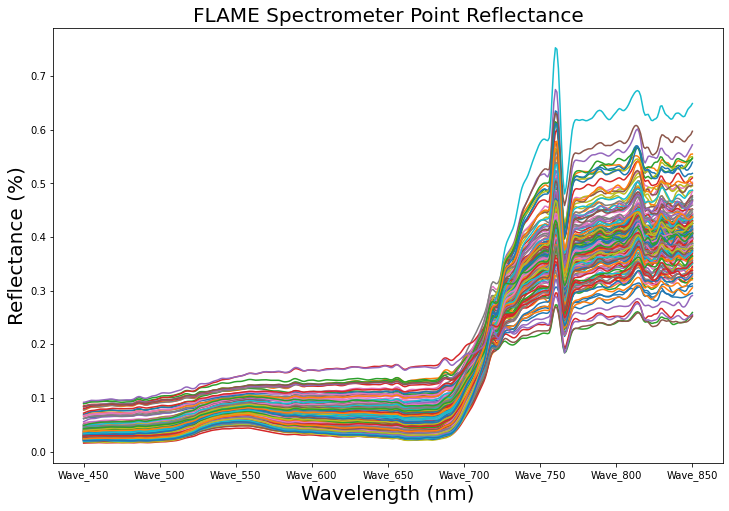

In [21]:
#### Plot the spectra
fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
pt_refl.T.plot(ax=ax, kind='line')
ax.get_legend().remove()
ax.set_title('FLAME Spectrometer Point Reflectance', size=20)
ax.set_xlabel('Wavelength (nm)', size=20)
ax.set_ylabel('Reflectance (%)', size=20)

# save to PNG file
png_file = os.path.join(output_dir, 'Example_Kougarok_FLAME_Spectrometer_Reflectance.png')
ax.figure.savefig(png_file)

In [22]:
##### Overly spec points - first create a new ee.Feature object
# repull csv data into a geemap spatial object (ee.Featurecollection)
in_csv = 'https://storage.googleapis.com/bnl_uas_data/NGEEArctic_Seward_Osprey_Kougarok_20180725_Flight6_Spectra.csv'
pt_refl_data_gee = geemap.xy_to_points(in_csv,latitude='Latitude_DD',longitude='Longitude_DD')

In [23]:
#### Create map and overlay spec points
uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=18);
uas_map.addLayer(kg_rgb_image, RGB_imageVisParam, 'UAS_Kougarok_20180725_Flight6_RGB')
uas_map.addLayer(chm_uas_image_masked, demViz, 'UAS_Kougarok_20180725_Flight6_CHM')
uas_map.add_colorbar(vis_params=demViz, label='SfM CHM (meters)')
uas_map.addLayer(pt_refl_data_gee,{},'Spectrometer Points')
uas_map

In [24]:
# Save this example map as an interactive HTML file
html_file = os.path.join(output_dir, 'Example_Kougarok_FLAME_Spec_CHM_UAS_Map.html')
uas_map.save(html_file)

In [25]:
##### Extract and export UAS raster data to FLAME spec points
# !NOTE: This step will take awhile as the code retrieves the data from the remote rasters
print(output_dir)
out_csv1 = os.path.join(output_dir, 'CHM.csv')
geemap.extract_values_to_points(pt_refl_data_gee, chm_uas_image_masked, out_csv1)

out_csv2 = os.path.join(output_dir, 'TIR.csv')
geemap.extract_values_to_points(pt_refl_data_gee, tir_uas_image_masked, out_csv2)

/var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output
Generating URL ...
Please wait ...
Data downloaded to /var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output/CHM.csv
Generating URL ...
Please wait ...
Data downloaded to /var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output/TIR.csv


CHM data (meters)
0      0.019791
1      0.005608
2      1.888496
3      0.001000
4      1.348770
         ...   
160    1.730499
161    0.013924
162    0.071541
163    0.061447
164    0.023560
Name: first, Length: 165, dtype: float64
TIR data (deg C)
0      22.2
1      24.2
2      17.7
3      24.6
4      18.3
       ... 
160    20.8
161    25.2
162    24.2
163    25.8
164    25.9
Name: first, Length: 165, dtype: float64


<AxesSubplot:>

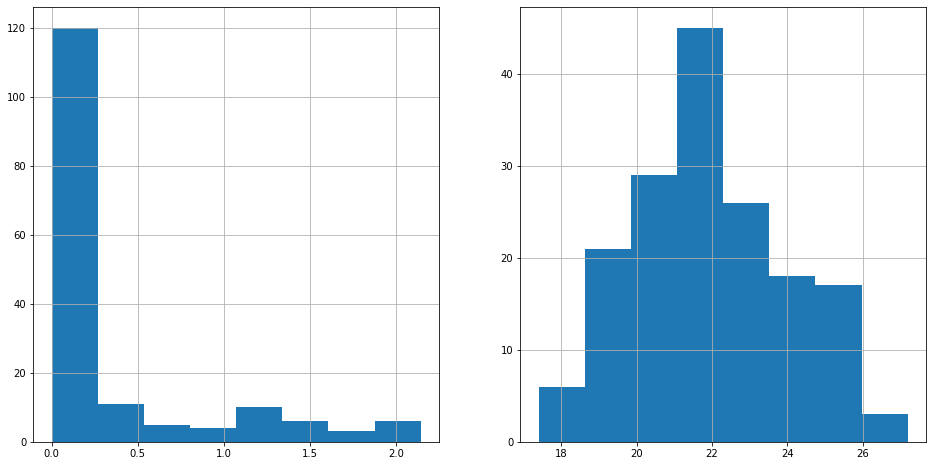

In [26]:
# view data
chm_data = pd.read_csv(out_csv1)
print("CHM data (meters)")
#print(chm_data['B0'])
print(chm_data['first'])
chm_data = chm_data['first']

tir_data = pd.read_csv(out_csv2)
print("TIR data (deg C)")
print(tir_data['first'])
tir_data = tir_data['first']

### Dual histogram
fig = pl.figure(figsize=(16, 8))
axes = fig.subplots(1, 2)
chm_data.hist(bins=8, ax=axes[0])
tir_data.hist(bins=8, ax=axes[1])

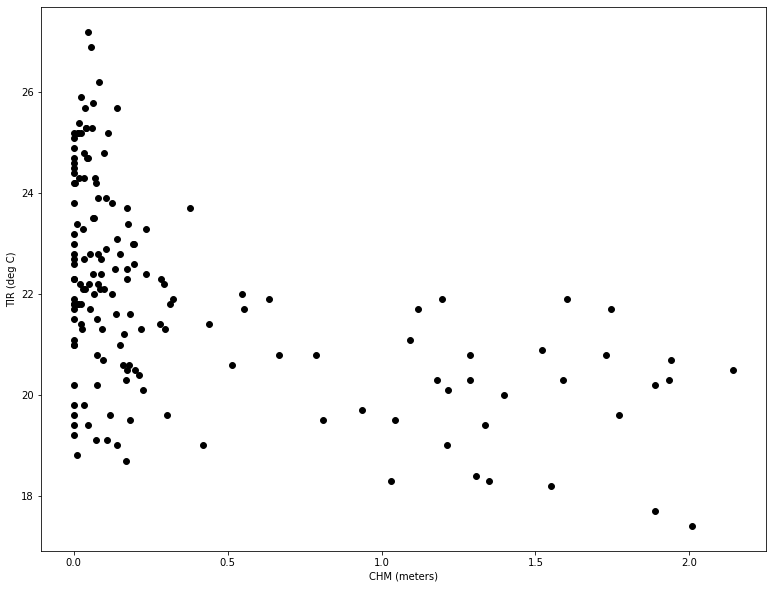

In [27]:
##### CHM vs TIR
pl.figure(figsize=(13, 10))
pl.scatter(chm_data, tir_data, marker='o',s=35, c="black");
pl.xlabel("CHM (meters)")
pl.ylabel("TIR (deg C)")

png_file = os.path.join(output_dir, 'Example_Kougarok_CHM_vs_TIR_Scatterplot.png')
pl.savefig(png_file, bbox_inches='tight')

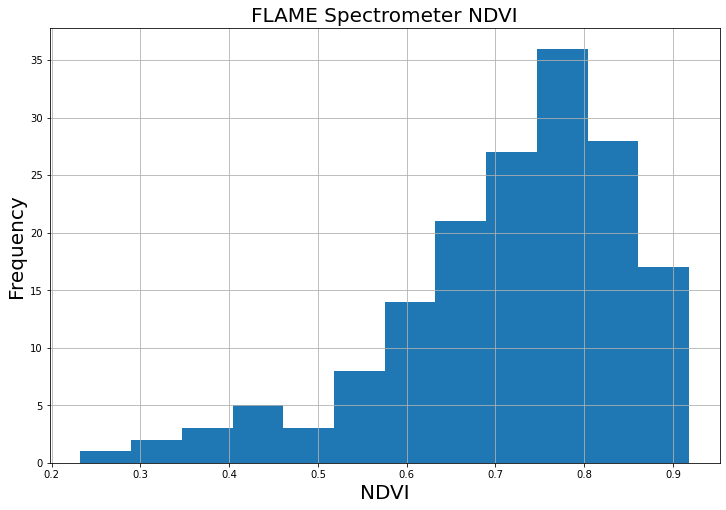

In [28]:
##### Create NDVI histogram from reflectance data
ndvi = pt_refl_data.loc[:,'Wave_830'].subtract(pt_refl_data.loc[:,'Wave_655']) / \
pt_refl_data.loc[:,'Wave_830'].add(pt_refl_data.loc[:,'Wave_655'])
ndvi

fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
hist = ndvi.hist(bins=12)
ax.set_title('FLAME Spectrometer NDVI', size=20)
ax.set_xlabel('NDVI', size=20)
ax.set_ylabel('Frequency', size=20)

# save to PNG file
png_file = os.path.join(output_dir, 'Example_Kougarok_FLAME_Spectrometer_NDVI_Histogram.png')
ax.figure.savefig(png_file)

In [29]:
##### Compare UAS NDVI with Landsat 8
l8 = ee.ImageCollection('LANDSAT/LC08/C01/T1_8DAY_NDVI').filterDate('2018-07-01', '2018-09-10')\
.filterBounds(pt_refl_data_gee);
l8_ndvi = l8.select('NDVI');
#water = l8_ndvi.first().lt(0.5)
#mask = water.eq(1);

# Composite
# https://developers.google.com/earth-engine/guides/ic_composite_mosaic
l8_maxval_ndvi_composite = l8_ndvi.max();
#image = ee.Image(filtered.mosaic())

In [30]:
#### Map Landsat 8 Maximum Value Composite with RGB UAS image
ndvi_palette = cm.get_palette('viridis', n_class=30)
ndviViz = {'min': 0.0, 'max': 1.0, 'palette': ndvi_palette, 'opacity': 1}

uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=14);
uas_map.addLayer(l8_maxval_ndvi_composite, ndviViz, 'Landsat 8 NDVI');
uas_map.add_colorbar(vis_params=ndviViz, label='Landsat 8 NDVI (-)')
uas_map.addLayer(kg_rgb_image, RGB_imageVisParam, 'UAS_Kougarok_20180725_Flight6_RGB')
uas_map

In [31]:
# Save this example map as an interactive HTML file
html_file = os.path.join(output_dir, 'Example_Kougarok_Landsat_NDVI_w_RGB_UAS.html')
uas_map.save(html_file)

In [32]:
#### Extract Landsat NDVI to file
print(output_dir)
out_csv3 = os.path.join(output_dir, 'Landsat8_NDVI_JulyAug2018.csv')
geemap.extract_values_to_points(pt_refl_data_gee, l8_maxval_ndvi_composite, out_csv3, scale=1)

/var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output
Generating URL ...
Please wait ...
Data downloaded to /var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output/Landsat8_NDVI_JulyAug2018.csv


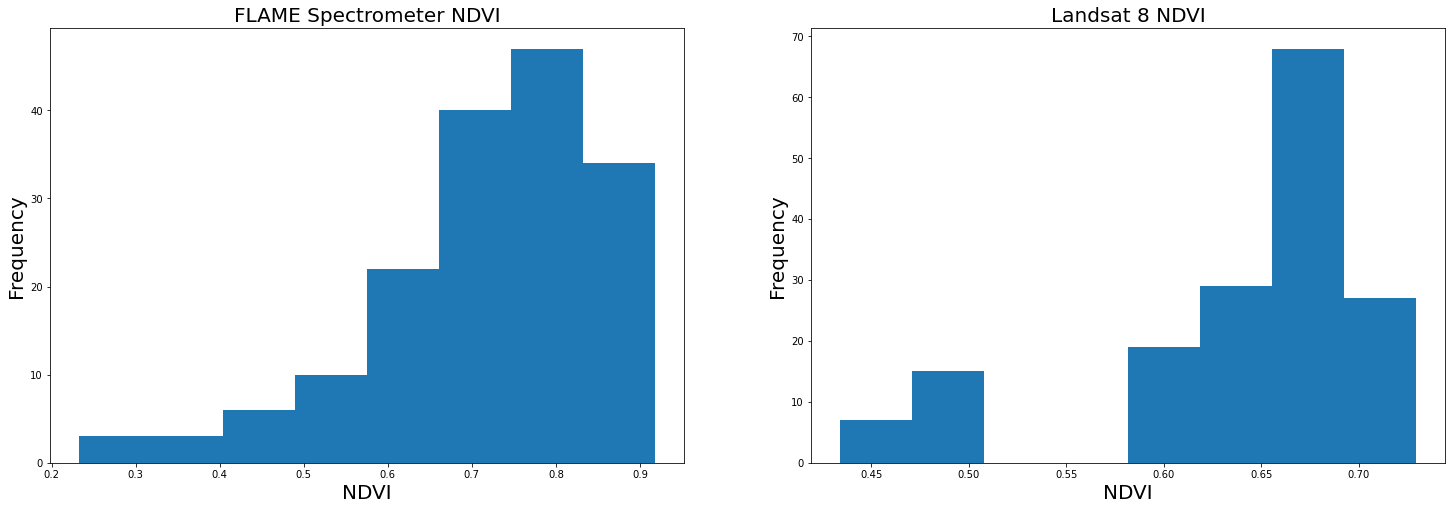

In [33]:
#### Compare UAS NDVI with a Landsat 8 Maximum Value Composite
landsat8_ndvi_data = pd.read_csv(out_csv3)
#landsat8_ndvi_data = landsat8_ndvi_data['NDVI']
landsat8_ndvi_data = landsat8_ndvi_data['first']

fig = pl.figure(figsize=(25, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(ndvi, bins=8)
ax1.set_title('FLAME Spectrometer NDVI', size=20)
ax1.set_ylabel('Frequency', size=20)
ax1.set_xlabel('NDVI', size=20)
ax2.set_title('Landsat 8 NDVI', size=20)
ax2.hist(landsat8_ndvi_data, bins=8)
ax2.set_ylabel('Frequency', size=20)
ax2.set_xlabel('NDVI', size=20)

# save to PNG file
png_file = os.path.join(output_dir, 'Example_Kougarok_UAS_Landsat8_NDVI_Historgram.png')
fig.figure.savefig(png_file)

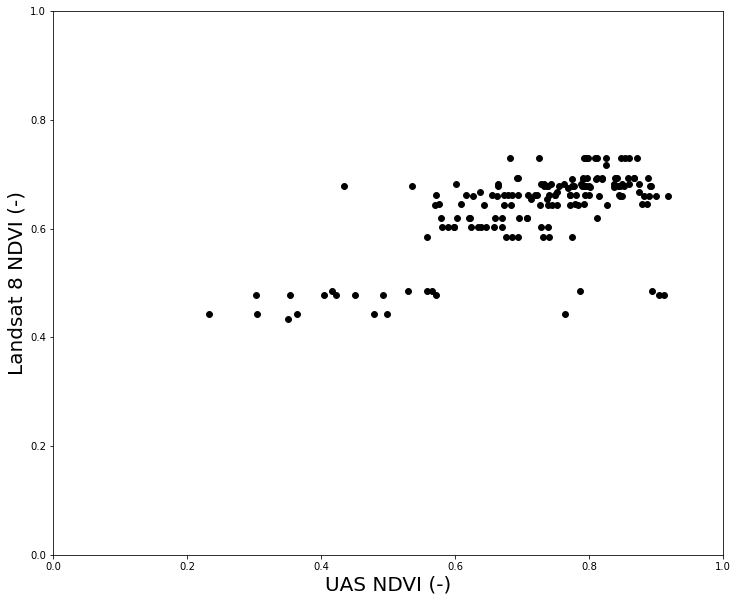

In [34]:
##### XY scatter plot - UAS NDVI vs Landsat 8
pl.figure(figsize=(12, 10))
pl.scatter(ndvi, landsat8_ndvi_data, marker='o', s=35, c="black")
pl.xlabel("UAS NDVI (-)", size=20)
pl.ylabel("Landsat 8 NDVI (-)", size=20)
pl.xlim(0, 1)
pl.ylim(0, 1)

# save to PNG file
png_file = os.path.join(output_dir, 'Example_Kougarok_UAS_Landsat8_NDVI_Scatterplot.png')
pl.savefig(png_file, bbox_inches='tight')